In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

plt.rcParams["font.family"] = "SimSun"
plt.rcParams["axes.unicode_minus"] = False

os.environ["MYLIB_DATASETS_DIR"] = "../dataset/data"
os.environ["KERAS_BACKEND"] = "jax"

IMG_DIR = Path("../output/imgs")
if not IMG_DIR.exists():
    IMG_DIR.mkdir()
plot_kw = dict(show=True, save=False, img_dir=IMG_DIR / "base")

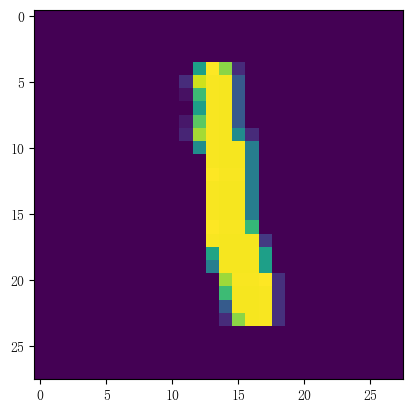

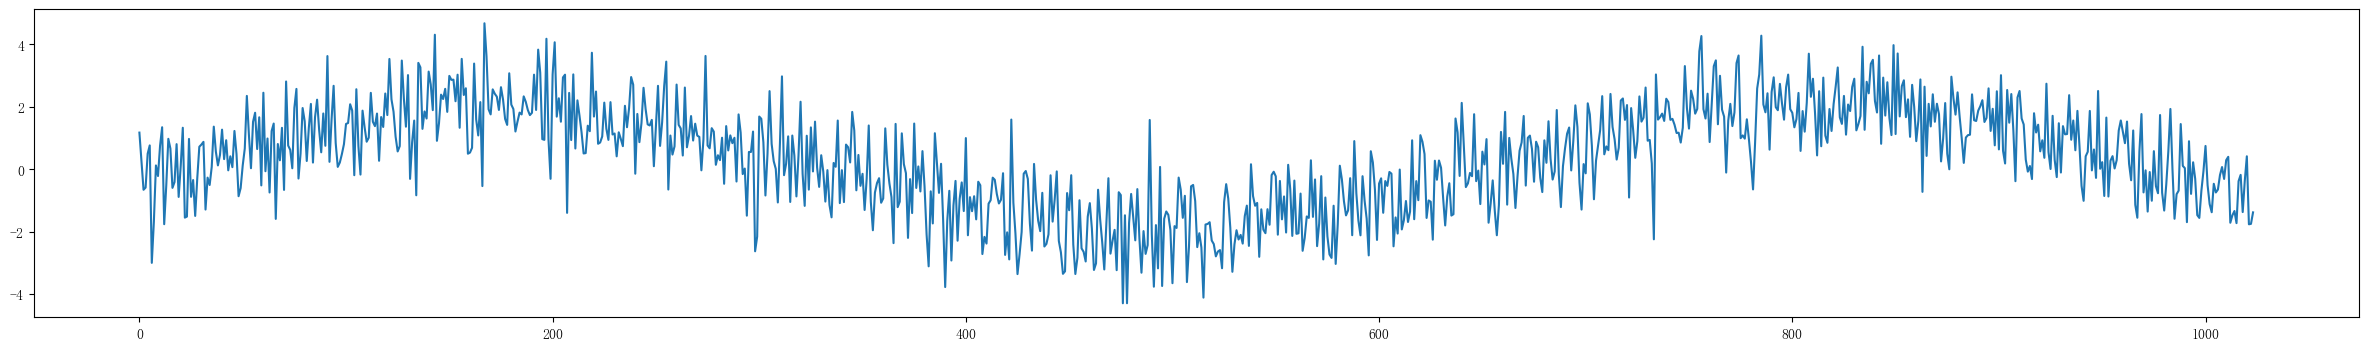

In [ ]:
#LSTM
from mylib.plot import *
SEED = 2024
np.random.seed(SEED)
set_rcParams(figsize=(30,4))
N = 1024
dt = 0.01
t = np.arange(0,N * dt, dt) + SEED * 1e2
A = 2
data = np.random.randn(N) + np.sin(t) * A
plt.plot(data)


0.4.37
[CpuDevice(id=0)]
